### Overview

As preparation for its standards revision, CSTA worked with subject matter experts to gather data about state standards and to map those standards to the current 2017 CSTA K-12 standards. This work was completed in the first half of 2024. The raw data -- a spreadsheet containing information about approximately 10,000 state computer science learning standards -- is available as a [Google Sheet](https://docs.google.com/spreadsheets/d/1briGyFqq5pKO5Rb1-Gp7WeTLsLD6GLnKPM3D3QJBDwk/edit?gid=570385718#gid=570385718). This notebook contains some tools that may be helpful in processing the raw data.

To begin, you will need to make a copy of this notebook (File → Save a copy in Drive).

You will need to make a copy of the [.csv file](https://drive.google.com/file/d/1_wbgdCXGEn-uE9kElh1mlWoJskKKOd-v/view?usp=sharing) containing the state standards. Then, upload it to your Google Drive.

If you plan on using the CSTA standards, you will need to make a copy of the [.csv file](https://drive.google.com/file/d/12ZpMSshsQmnaqXIG-9nCcbJT572QxhwG/view?usp=sharing) containing the CSTA standards. Then, upload it to your Google Drive.



### Data Cleaning and Preparation

#### Imports

In [ ]:
import pandas as pd

⚠️ In the block below, you will need to replace "PATH" with the path to your copy of the [.csv file](https://drive.google.com/file/d/1_wbgdCXGEn-uE9kElh1mlWoJskKKOd-v/view?usp=sharing) of the state standards.

In [ ]:
df = pd.read_csv("/content/State Standards (for Distribution) - Standards.csv")

In [ ]:
print("There are", str(len(df)), "rows.")

There are 10734 rows.


⚠️ If you plan on using the CSTA standards, you will need to replace "PATH" with the path to your copy of the [.csv file](https://drive.google.com/file/d/12ZpMSshsQmnaqXIG-9nCcbJT572QxhwG/view?usp=sharing) of the CSTA standards. Then, run the block below.

In [ ]:
csta = pd.read_csv("/content/State Standards - CSTA Standards.csv")

#### Cleaning and error correction

We decided to exclude some rows from our analysis -- the block below deletes those items that we deemed not to be discrete standards.

In [ ]:
print("start length: ", len(df))

# e.g., 'Continuation of this standard is not specifically included or excluded'
condition1 = df['Standard'].str.split().str[0] != 'Continuation'
df = df[condition1]

# e.g., "This standard is not specifically required until . . ."
condition2 = df["Standard"].str.split().str[0] != "This"
df = df[condition2]

# e.g., "Continued Growth"
condition3 = df["Standard"].str.split().str[0] != "Continued"
df = df[condition3]

# e.g., "Begins in Grade 6"
condition4 = df["Standard"].str.split().str[0] != "Begins"
df = df[condition4]

print("new length: ", len(df))

start length:  10734
new length:  10067


There are some rows that introduce the standards for a state -- the block below deletes those rows.

In [ ]:
print("start length: ", len(df))

flags = ['CALIFORNIA - Other Info includes',
         'WASHINGTON - WA standards',
         'ARIZONA - Category'
         'NEVADA - Category',
         'ALASKA Some of the standards',
         'IDAHO - Other Info is',
         'UTAH - Other Info is clarifying',
         'WYOMING Standards',
         'MONTANA - Standards',
         'COLORADO It',
         'HAWAII - Directly adopted',
         'NEW MEXICO - Directly',
         'NORTH DAKOTA Other Info',
         'Alabama Other Info',
         'Oklahoma Other',
         'Arkansas Other Info',
         'Other Info includes', # this is Arizona
         'Concept Connection' # this is Nevada
         ]

for flag in flags:
  df = df[~df['Grade Level'].str.contains(flag, case=False, na=False)]

print("new length: ", len(df))

start length:  10067
new length:  10051


One column name has an extra space -- the block below fixes that.

In [ ]:
df.rename(columns={'Course ': 'Course'}, inplace=True)

We identified some errors in the dataset -- these are corrected in the block below.

In [ ]:
# fixing a typo in the state name
df['State Name'] = df['State Name'].replace('Illlinois', 'Illinois')

# one WA standard was incorrectly labelled 9-12 -- correcting that to 9-10 per CSTA match
df.loc[(df['State Name'] == 'WA') & (df['Grade Band'] == '9-12'), 'Grade Band'] = '9-10'

# one state standard is missing some info
df.loc[df['State Identifier'] == '3.5.6-8.G', ['State Name', 'Grade Band']] = ['PA', '6-8']

# correcting a typo for grade band
df.loc[df['Grade Band'] == '11-13', 'Grade Band'] = '11-12'

# some Indiana high school courses were incorrectly labelled 9th - 10th -- correcting to 9th - 12th
df.loc[(df["State Name"] == "Indiana") & (df["Grade Band"] == "9-10"), "Grade Band"] = "9-12"

The block below corrects some typos.

In [ ]:
df['Category'] = df['Category'].str.replace(r'\bConputing\b', 'Computing', regex=True)
df['Category'] = df['Category'].str.replace(r'\bAbsraction\b', 'Abstraction', regex=True)
df['Category'] = df['Category'].str.replace(r'\bEmering\b', 'Emerging', regex=True)
df['Category'] = df['Category'].str.replace(r'\bSysems\b', 'Systems', regex=True)
df['Category'] = df['Category'].str.replace(r'\bProgamming\b', 'Programming', regex=True)
df['Category'] = df['Category'].str.replace(r'\bTihnking\b', 'Thinking', regex=True)
df['Category'] = df['Category'].str.replace(r'\bCommunciation\b', 'Communication', regex=True)

Texas' high school standards were accidentally not assigned to a grade band -- the block below fixes that.

In [ ]:
df.loc[(df['State Name'] == 'Texas') & (df['Grade Level'].isna()), 'Grade Band'] = '9-12'

In some rows, the value for ~CSTA was accidentally left blank; we imputed a value based on other information in the row in the block below.

In [ ]:
df.at[3469, '~CSTA'] = "similar"
df.at[4460, '~CSTA'] = "based"
df.at[5429, '~CSTA'] = "different"
df.at[5750, '~CSTA'] = "different"
df.at[5863, '~CSTA'] = "based"
df.at[5864, '~CSTA'] = "similar"
df.at[5865, '~CSTA'] = "based"
df.at[6098, '~CSTA'] = "based"
df.at[6142, '~CSTA'] = "based"
df.at[6982, '~CSTA'] = "based"
df.at[7129, '~CSTA'] = "based"
df.at[7188, '~CSTA'] = "different"
df.at[7312, '~CSTA'] = "based"
df.at[7643, '~CSTA'] = "different"
df.at[8017, '~CSTA'] = "based"
df.at[9505, '~CSTA'] = "different"

The CSTA Identifier and the CSTA Standard should be blank if ~CSTA is 'different,' but sometimes this was not done, so the block below deletes the CSTA Identifier and the CSTA Standard in those cases.

In [ ]:
df.loc[df['~CSTA'] == 'different', 'CSTA Identifier'] = ''
df.loc[df['~CSTA'] == 'different', 'CSTA Standard'] = ''

The Google Sheet that was used for data collection automatically appended ascending dates to some course names -- these are fixed in the block below.

In [ ]:
df['Course'] = df['Course'].str.split(',').str[0]
df['Course'] = df['Course'].str.split('adopted').str[0]

# correcting a typo in the course name
df['Course'] = df['Course'].str.replace(r'\bFoundatins of Cybersecurity\b', 'Foundations of Cybersecurity', regex=True)

#### Deleting empty rows

A few rows are completely or mostly empty -- the next two blocks eliminates those rows.

In [ ]:
# dropping completely empty rows
print("old length: ", len(df))
df = df.dropna(how='all')
print("new length: ", len(df))

old length:  10051
new length:  10035


In [ ]:
# there is one row where everything is empty except that ~CSTA is a space
print("old length: ", len(df))
df = df[df['~CSTA'] != ' ']
print("new length:", len(df))

old length:  10035
new length: 10034


Some rows are empty except for the state name; the block below deletes those rows.

In [ ]:
df = df.dropna(subset=['Grade Level', 'Grade Band'], how='all')
print("new length:", len(df))

new length: 10029


Some rows are empty except for the state name and grade band; the block below deletes those rows.

In [ ]:
df = df.dropna(subset=['State Identifier', 'Standard'], how='all')
print("new length:", len(df))

new length: 10018


#### Preparation

Some states have a full name (i.e., Alabama) while others just have an abbreviation (i.e., AL) -- the block below replaces abbreviations with state name.

In [ ]:
state_abbreviations = {"AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California", "CO": "Colorado",
                       "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia", "HI": "Hawaii", "ID": "Idaho",
                       "IL": "Illinois", "IN": "Indiana", "IA": "Iowa", "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana",
                       "ME": "Maine", "MD": "Maryland", "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota",
                       "MS": "Mississippi", "MO": "Missouri", "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire",
                       "NJ": "New Jersey", "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota",
                       "OH": "Ohio", "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island",
                       "SC": "South Carolina", "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
                       "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming"}

for state, abbreviation in state_abbreviations.items():
    df['State Name'] = df['State Name'].replace(state, abbreviation)

<ipython-input-42-2e698f49ad35>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['State Name'] = df['State Name'].replace(state, abbreviation)


The next block creates a new column for the CSTA concept. Note that standards categorized as different from all CSTA standards will not have a value in this column.

In [ ]:
df['CSTA Concept'] = df['CSTA Identifier'].str.split("-").str[1]

df['CSTA Concept'] = df['CSTA Concept'].replace('CS', "Computing Systems")
df['CSTA Concept'] = df['CSTA Concept'].replace('AP', "Algorithms and Programming")
df['CSTA Concept'] = df['CSTA Concept'].replace('DA', "Data and Analysis")
df['CSTA Concept'] = df['CSTA Concept'].replace('IC', "Impacts of Computing")
df['CSTA Concept'] = df['CSTA Concept'].replace('NI', "Networks and the Internet")

States use a combination of grade bands and grade levels to organize their standards. The next block adds a column called 'Uniform Band' that has a uniform grade band system (regardless of the system the state uses), with the following bands: K - 2nd, 3rd - 5th, 6th - 8th, and 9th - 12th.

In [ ]:
bandLevelMap = {'K-2': "K-2",
                '3-5': "3-5",
                '6-8': "6-8",
                '9-12': "9-12",
                '9-12Specialty': "9-12",
                '9-10': "9-12",
                '11-12': "9-12",
                'High School': "9-12",
                '9-12Advanced': "9-12",
                'HS L1': "9-12",
                'HS L2': "9-12",
                '9-12Extension': "9-12",
                '5-8': "6-8", # note that 5th - 8th is mapped to 6th - 8th
                '11-13': "9-12",
                'K-1': "K-2",
                '2-3': "K-2", # note that 2nd - 3rd is mapped to K - 2nd
                '4-6': "3-5", # note that 4th - 6th is mapped to 3rd - 5th
                '7-8': "6-8",
                'K': "K-2",
                '1st': "K-2",
                '2nd': "K-2",
                '3rd': "3-5",
                '4th': "3-5",
                '5th': "3-5",
                '6th': "6-8",
                '7th': "6-8",
                '8th': "6-8",
                '9th': "9-12",
                '10th': "9-12",
                '11th': "9-12",
                '12th': "9-12",
                'PK': "K-2"} # note that PK is mapped to K - 2nd

df['Uniform Band'] = df['Grade Level'].fillna(df['Grade Band']).map(bandLevelMap)

If you want to use the state's assigned grade bands but cleaned up a bit, use the block below.

In [ ]:
df['Grade Band'] = df['Grade Band'].replace('9-12Advanced', "9-12")
df['Grade Band'] = df['Grade Band'].replace('9-12Extension', "9-12")
df['Grade Band'] = df['Grade Band'].replace('9-12Specialty', "9-12")
df['Grade Band'] = df['Grade Band'].replace('HS L1', "9-10")
df['Grade Band'] = df['Grade Band'].replace('HS L2', "11-12")
df['Grade Band'] = df['Grade Band'].replace('High School', "9-12")

If you are using the CSTA standards, you can use the block below to add the uniform grade bands to the CSTA standards.

In [ ]:
cstaMap = {'1A': "K-2",
                '1B': "3-5",
                '2': "6-8",
                '3A': "9-12",
                '3B': "9-12"}

csta['Uniform Band'] = csta['Level'].map(cstaMap)

If you want to analyze the similarity of each state standard to the CSTA standards, it can be helpful to have the similarity level (identical, similar, based, or different) expressed as a number. Use the block below to add that to the dataframe.

In [ ]:
score_map = {
    'identical': 4,
    'similar': 3,
    'based': 2,
    'different': 1}

df['CSTA similarity'] = df['~CSTA'].map(score_map)

Some state standards appear in more than one row. This occurred because sometimes the subject matter experts (who did the original coding of standards) felt that one standard was similar to and/or based on more than one CSTA standard.

Below, we create two dataframes:

1.   **dfAll** has all of the rows in the original df, meaning that some standards will have more than one row. This df is useful when analyzing CSTA standards because it includes all of the state standards that were mapped to a CSTA standard.
2.   **dfOne** has one row per standard. If a standard had more than one row in the original df, it keeps only the first row for that standard. This df is useful when analyzing state standards because no state standard appears more than once in it.


In [ ]:
print("start length:", len(df))

dfOne = df.drop_duplicates(subset=['State Identifier', 'State Name'], keep='first')
dfAll = df.copy()

# the original df becomes a string (so that it will throw an error if an attempt is made to treat it as a dataframe --
# this is to avoid confusion later on)
df = "empty"

print("all rows:", len(dfAll))
print("number of standards:", len(dfOne))
print("the original df is now", df)

start length: 10018
all rows: 10018
number of standards: 9695
the original df is now empty


### Cognitive Complexity

The next block of code assigns a Bloom's level to a list of verbs. The assignment is mapped as follows:

*   Remember → 1
*   Understand → 2
*   Apply → 3
*   Analyze → 4
*   Evaluate → 5
*   Create → 6

The assignment is based on the verb list in *Bloom's for Computing: Enhancing Bloom's Revised Taxonomy with Verbs for Computing Disciplines* ([PDF](https://ccecc.acm.org/files/publications/Blooms-for-Computing-20240814.pdf)).

Any verb that occurred more than 30 times in the state standards and was not in *Bloom's for Computing* was added based on (1) its similarity to verbs on the list and/or (2) how it is usually used in the standards. The table below contains these verbs, their levels, and -- where relevant -- the rationale for the level.

| Verb | Bloom Level | Comment |
|----------|----------|----------|
| research    | 4   |    |
| collect | 3 | |
| utilize | 3 |same as 'use' |
| explore | 3 ||
| understand| 2||
| communicate| 3||
| determine| 5||
| seek| 5 | context is usually "seek and incorporate feedback"|
| recommend| 5||
| represent| 2||
| observe| 2||
| credit| 3 | context is usually "give credit" |
| incorporate| 3 | context is usually "incorporate existing code into something new" |
| refine| 3||

In [ ]:
blooms = [
    ["Define", 1], ["Annotate", 2], ["Apply", 3], ["Investigate", 3], ["Analyze", 4], ["Adapt", 5], ["Assemble", 6],
    ["Duplicate", 1], ["Classify", 2], ["Backup", 3], ["Iterate", 3], ["Articulate", 4], ["Administer", 5], ["Collaborate", 6],
    ["Enumerate", 1], ["Comment", 2], ["Build", 3], ["Manipulate", 3], ["Attribute", 4], ["Appraise", 5], ["Compose", 6],
    ["Find", 1], ["Convert", 2], ["Calculate", 3], ["Map", 3], ["Automate", 4], ["Argue", 5], ["Construct", 6],
    ["Identify", 1], ["Demonstrate", 2], ["Carry out", 3], ["Measure", 3], ["Categorize", 4], ["Assess", 5], ["Create", 6],
    ["Label", 1], ["Describe", 2], ["Code", 3], ["Modify", 3], ["Compare", 4], ["Choose", 5], ["Design", 6],
    ["List", 1], ["Differentiate", 2], ["Compile", 3], ["Operate", 3], ["Contextualize", 4], ["Critique", 5], ["Develop", 6],
    ["Locate", 1], ["Discuss", 2], ["Compute", 3], ["Perform", 3], ["Contrast", 4], ["Debate", 5], ["Devise", 6],
    ["Memorize", 1], ["Exemplify", 2], ["Configure", 3], ["Produce", 3], ["Correlate", 4], ["Debug", 5], ["Formulate", 6],
    ["Name", 1], ["Explain", 2], ["Connect", 3], ["Provision", 3], ["Decompose", 4], ["Decide", 5], ["Generate", 6],
    ["Recall", 1], ["Infer", 2], ["Decrypt", 3], ["Randomize", 3], ["Deconstruct", 4], ["Defend", 5], ["Hypothesize", 6],
    ["Recognize", 1], ["Interpret", 2], ["Deploy", 3], ["Recover", 3], ["Deduce", 4], ["Invent", 6],
    ["Reference", 1], ["Paraphrase", 2], ["Diagram", 3], ["Restore", 3], ["Detect", 4],
    ["Estimate", 5], ["Make", 6], ["Retrieve", 1], ["Report", 2], ["Document", 3], ["Schedule", 3], ["Discriminate", 4],
    ["Evaluate", 5], ["Plan", 6], ["Select", 1], ["Summarize", 2], ["Edit", 3], ["Solve", 3], ["Distinguish", 4],
    ["Judge", 5], ["Program", 6], ["State", 1], ["Translate", 2], ["Encrypt", 3], ["Store", 3], ["Examine", 4],
    ["Justify", 5], ["Script", 6], ["Optimize", 5], ["Execute", 3], ["Train", 3], ["Generalize", 4],
    ["Optimize", 5], ["Secure", 6], ["Graph", 3], ["Use", 3], ["Integrate", 4], ["Prioritize", 5], ["Visualize", 6],
    ["Illustrate", 3], ["Virtualize", 3], ["Model", 4], ["Prove", 5], ["Implement", 3], ["Write", 3], ["Monitor", 4],
    ["Support", 5], ["Install", 3], ["Organize", 4], ["Test", 5], ["Outline", 4], ["Validate", 5], ["Predict", 4],
    ["Value", 5], ["Simulate", 4], ["Verify", 5], ["Structure", 4], ["Trace", 4], ["Translate", 4], ["Update", 4], ["Research", 4],
    ["Collect", 3], ["Utilize", 3], ["Explore", 3], ["Understand", 2], ['Communicate', 3], ['Determine', 5], ["Seek", 5],
    ["Recommend", 5], ["Represent", 2], ["Observe", 2], ["Credit", 3], ["Incorporate", 3], ['Refine', 3]]

The next block defines functions to prepare standards so that their Bloom's level can be identified. This mostly involves removing any words that appear before the verb. These will clean every first word that occurs more than 16 times.

In [ ]:
def withFixer(text): # removing when standard begins e.g., "with teacher support"
  try:
    commaSplit = text.split(', ')
    firstWord = commaSplit[1].split(' ')
    return firstWord[0]
  except: # some don't have a comma, and their verb is always the third word
    spaceSplit = text.split(' ')
    return spaceSplit[2]

def theFixer(text): # removes several phrases that appear before the main verb
  if text.startswith("The student, with guidance from an educator,"):
    return "applies"
  if text.startswith("The student is expected to"):
    words = text.split()
    return words[5]
  if text.startswith("The student will"):
    words = text.split()
    return words[3]
  if text.startswith("The will"): # probably a typo
    return "identify"
  if text.startswith("The students"):
    return "discuss"

def sysFixer(text): # removing the word 'systematically'
  words = text.split()
  return words[1]

def giveFixer(text): # replaces 'give' with a more appropriate verb, based on context
  if "Give attribution" or "give attribution" in text:
    return "credit"
  if text.startswith("Give examples"):
    return "exemplify"

def indyFixer(text): # removes 'independently'
  if text.startswith("Independently and collaboratively"):
    return text.split()[3]
  if text.startswith("Independently or with guidance"):
    if text.split()[4] == 'give':
      return "credit"
    return text.split()[4]
  if text.startswith("With guidance, independently or collaboratively"):
    return text.split()[5]
  if text.startswith("Independently or collaboratively"):
    return text.split()[3]
  if text.startswith("With guidance, independently and collaboratively"):
    return text.split()[5]
  if text.startswith("Independently"):
    return text.split()[1]
  return "construct"

def plusFixer(text): # fixes standards beginning with '(+)'
  return text[4:].lower().split()[0]

def spaceFixer(text): # fixing where, as the result of other functions, the first word is an empty string
  if text.split()[0] == "Risk":
    return text.split()[4]
  if text.split()[0] == "Cybersecurity":
    if text.split()[4] == 'clearly':
      return text.split()[7]
    return text.split()[4]
  return text.split()[0].lower()

def usingFixer(text): # fixes where the first word is 'using'
  if text.startswith("Using grade appropriate content and complexity,"):
    return text.split()[6]
  if text.startswith("Using correct terminology,"):
    return text.split()[3]
  if text.startswith("Using grade level appropriate content and complexity, discuss"):
    return "discuss"
  if text.startswith("Using accurate terminology, identify"):
    return "identify"
  if text.startswith("The student will,"):
    return "analyze"
  if text.startswith("With teacher assistance, using correct terminology, describe"):
    return "describe"
  if text.startswith("Using correct terminology explain"):
    return "explain"
  if text.startswith("Using visual aids and documentation, illustrate"):
    return "illustrate"
  if text.startswith("Using guided questions, work through a program to identify"):
    return "identify"
  if text.startswith("Using the software life cycle process, create"):
    return "create"
  if text.startswith("Using computational tools, transform"):
    return "transform"
  if text.startswith("Using age-appropriate vocabulary, explain"):
    return "explain"
  if text.startswith("Using the software application life cycle and prototype development model, develop"):
    return "develop"
  if text.startswith("Using recognition software, identify"):
    return "identify"
  if text.startswith("Using a given program known to contain errors, identify"):
    return "identify"
  if text.startswith("Using a data visualization tool, investigate"):
    return "investigate"

def getFirstWord(text):
  firstWord = text.split(' ', 1)[0]
  firstWord = firstWord.lower()
  if firstWord == "with":
    firstWord = withFixer(text)
  if firstWord == "the":
    firstWord = theFixer(text)
  if firstWord == 'systematically':
    firstWord = sysFixer(text)
  if firstWord == 'give':
    firstWord = giveFixer(text)
  if firstWord == "independently":
    firstWord = indyFixer(text)
  if firstWord == '(+)':
    firstWord = plusFixer(text)
  if firstWord == '':
    firstWord = spaceFixer(text)
  if firstWord == "using":
    firstWord = usingFixer(text)
  if firstWord is not None and firstWord[-1] == ",":
      firstWord = firstWord[0:-1]
  try:
    return firstWord.capitalize()
  except:
    return None

The next block determines the Bloom's level for the standards. (Note that not every standard is covered -- see above for details.)

In [ ]:
# returns the Bloom's level if the word is in the list
def getBloomLevel(blooms, verb):
  for entry in blooms:
    if entry[0] == verb:
      return entry[1]
  return None

dfOne['Bloom Level'] = [getBloomLevel(blooms, getFirstWord(x)) for x in dfOne['Standard']]
dfAll['Bloom Level'] = [getBloomLevel(blooms, getFirstWord(x)) for x in dfAll['Standard']]

If you would prefer a word instead of a number for the Bloom's level, run the block below.

In [ ]:
bloomMap = {
    1: 'Remember',
    2: 'Understand',
    3: 'Apply',
    4: 'Analyze',
    5: 'Evaluate',
    6: 'Create'}

dfOne["Bloom Level"] = dfOne["Bloom Level"].map(bloomMap)
dfAll["Bloom Level"] = dfAll["Bloom Level"].map(bloomMap)

### Misc

##### standards without Bloom's level

Determining the Bloom's level for each state standard is complex. The code above does it for almost all of the standards. The block below outputs what percent of standards for each state do *not* have a Bloom's level assigned to them.

In [ ]:
def percent_none(series):
    total = series.size
    none_count = series.isna().sum()
    return (none_count / total) * 100

noBlooms = dfOne.groupby('State Name')['Bloom Level'].apply(percent_none).reset_index()

# renaming the column
noBlooms.rename(columns = {'Bloom Level': "Percent Missing"}, inplace = True)

noBlooms.sort_values(by="Percent Missing")

,State Name,Percent Missing
11,Illinois,3.311258
3,Arkansas,3.412256
16,Maryland,4.048583
13,Iowa,4.166667
23,New Hampshire,4.166667
38,Washington,4.166667
18,Michigan,4.166667
25,New Mexico,4.166667
6,Connecticut,4.166667
9,Hawaii,4.166667


##### date of adoption

The block below contains a dictionary with the year that each state adopted its newest CS standards. Note that there is some ambiguity to this process (e.g., different adoption years for K - 8th and 9th - 12th), and this information will quickly become out of date.

In [ ]:
date_map = {"Alabama": 2018,
            "Alaska": 2019,
            "Arizona": 2018,
            "Arkansas": 2020,
            "California": 2018,
            "Colorado": 2018,
            "Connecticut": 2018,
            "Delaware": 2018,
            "Florida": 2016,
            "Georgia": 2022,
            "Hawaii": 2018,
            "Idaho": 2017,
            "Illinois": 2022,
            "Indiana": 2022,
            "Iowa": 2018,
            "Kansas": 2019,
            "Kentucky": 2019,
            "Maryland": 2018,
            "Massachusetts": 2016,
            "Michigan": 2019,
            "Mississippi": 2018,
            "Missouri": 2019,
            "Montana": 2020,
            "Nevada": 2018,
            "New Hampshire": 2018,
            "New Jersey": 2020,
            "New Mexico": 2018,
            "New York": 2020,
            "North Carolina": 2020,
            "North Dakota": 2019,
            "Ohio": 2018,
            "Oklahoma": 2018,
            "Pennsylvania": 2018,
            "Rhode Island": 2018,
            "South Carolina": 2018,
            "Tennessee": 2020,
            "Texas": 2022,
            "Utah": 2020,
            "Virginia": 2017,
            "Washington": 2018,
            "West Virginia": 2019,
            "Wisconsin": 2017,
            "Wyoming": 2020}

##### subpractice map

CSTA has a list of subpractices to which standards are mapped. The following list contains that mapping.

Note that no standards are mapped to subpractice 1.3.

Note that '4' and '7' are intentional -- some standards are mapped to these practices without being mapped to any particular subpractice.

Note that some standards are mapped to more than one subpractice.

In [ ]:
subpracticeMap = [('1A-CS-01', '1.1'),
 ('1A-CS-02', '7.2'),
 ('1A-CS-03', '6.2, 7.2'),
 ('1A-NI-04', '7.3'),
 ('1A-DA-05', '4.2'),
 ('1A-DA-06', '7.1, 4.4'),
 ('1A-DA-07', '4.1'),
 ('1A-AP-08', '4.4'),
 ('1A-AP-09', '4.4'),
 ('1A-AP-10', '5.2'),
 ('1A-AP-11', '3.2'),
 ('1A-AP-12', '5.1, 7.2'),
 ('1A-AP-13', '7.3'),
 ('1A-AP-14', '6.2'),
 ('1A-AP-15', '7.2'),
 ('1A-IC-16', '7'),
 ('1A-IC-17', '2.1'),
 ('1A-IC-18', '7.3'),
 ('1B-CS-01', '7.2'),
 ('1B-CS-02', '4.4'),
 ('1B-CS-03', '6.2'),
 ('1B-NI-04', '4.4'),
 ('1B-NI-05', '3.1'),
 ('1B-DA-06', '7.1'),
 ('1B-DA-07', '7.1'),
 ('1B-AP-08', '6.3, 3.3'),
 ('1B-AP-09', '5.2'),
 ('1B-AP-10', '5.2'),
 ('1B-AP-11', '3.2'),
 ('1B-AP-12', '5.3'),
 ('1B-AP-13', '1.1, 5.1'),
 ('1B-AP-14', '5.2, 7.3'),
 ('1B-AP-15', '6.1, 6.2'),
 ('1B-AP-16', '2.2'),
 ('1B-AP-17', '7.2'),
 ('1B-IC-18', '3.1'),
 ('1B-IC-19', '1.2'),
 ('1B-IC-20', '1.1'),
 ('1B-IC-21', '7.3'),
 ('2-CS-01', '3.3'),
 ('2-CS-02', '5.1'),
 ('2-CS-03', '6.2'),
 ('2-NI-04', '4.4'),
 ('2-NI-05', '7.2'),
 ('2-NI-06', '4.4'),
 ('2-DA-07', '4'),
 ('2-DA-08', '6.3'),
 ('2-DA-09', '5.3, 4.4'),
 ('2-AP-10', '4.4, 4.1'),
 ('2-AP-11', '5.1, 5.2'),
 ('2-AP-12', '5.1, 5.2'),
 ('2-AP-13', '3.2'),
 ('2-AP-14', '4.1, 4.3'),
 ('2-AP-15', '2.3, 1.1'),
 ('2-AP-16', '4.2, 5.2, 7.3'),
 ('2-AP-17', '6.1'),
 ('2-AP-18', '2.2'),
 ('2-AP-19', '7.2'),
 ('2-IC-20', '7.2'),
 ('2-IC-21', '1.2'),
 ('2-IC-22', '2.4, 5.2'),
 ('2-IC-23', '7.2'),
 ('3A-CS-01', '4.1'),
 ('3A-CS-02', '4.1'),
 ('3A-CS-03', '6.2'),
 ('3A-NI-04', '4.1'),
 ('3A-NI-05', '7.2'),
 ('3A-NI-06', '3.3'),
 ('3A-NI-07', '6.3'),
 ('3A-NI-08', '7.2'),
 ('3A-DA-09', '4.1'),
 ('3A-DA-10', '3.3'),
 ('3A-DA-11', '4.4'),
 ('3A-DA-12', '4.4'),
 ('3A-AP-13', '5.2'),
 ('3A-AP-14', '4.1'),
 ('3A-AP-15', '5.2'),
 ('3A-AP-16', '5.2'),
 ('3A-AP-17', '3.2'),
 ('3A-AP-18', '5.2'),
 ('3A-AP-19', '5.1'),
 ('3A-AP-20', '7.3'),
 ('3A-AP-21', '6.3'),
 ('3A-AP-22', '2.4'),
 ('3A-AP-23', '7.2'),
 ('3A-IC-24', '1.2'),
 ('3A-IC-25', '1.2'),
 ('3A-IC-26', '3.1'),
 ('3A-IC-27', '2.4'),
 ('3A-IC-28', '7.3'),
 ('3A-IC-29', '7.2'),
 ('3A-IC-30', '7.3'),
 ('3B-CS-01', '7.2'),
 ('3B-CS-02', '7.2'),
 ('3B-NI-03', '7.2'),
 ('3B-NI-04', '7.2'),
 ('3B-DA-05', '4.1'),
 ('3B-DA-06', '7.2'),
 ('3B-DA-07', '4.4'),
 ('3B-AP-08', '7.2'),
 ('3B-AP-09', '5.3'),
 ('3B-AP-10', '4.2'),
 ('3B-AP-11', '4.2'),
 ('3B-AP-12', '4.2'),
 ('3B-AP-13', '3.2'),
 ('3B-AP-14', '5.2'),
 ('3B-AP-15', '4.1'),
 ('3B-AP-16', '5.3'),
 ('3B-AP-17', '5.1'),
 ('3B-AP-18', '7.2'),
 ('3B-AP-19', '5.2'),
 ('3B-AP-20', '2.4'),
 ('3B-AP-21', '6.1'),
 ('3B-AP-22', '5.3'),
 ('3B-AP-23', '6.3'),
 ('3B-AP-24', '7.2'),
 ('3B-IC-25', '6.1, 1.2'),
 ('3B-IC-26', '1.2'),
 ('3B-IC-27', '7.2'),
 ('3B-IC-28', '3.3, 7.3')]

##### subconcept map

CSTA has a list of subconcepts to which standards are mapped. The following list contains that mapping.

In [ ]:
subconceptMap = [('1A-CS-01', 'Devices'),
 ('1A-CS-02', 'Hardware & Software'),
 ('1A-CS-03', 'Troubleshooting'),
 ('1A-NI-04', 'Cybersecurity'),
 ('1A-DA-05', 'Storage'),
 ('1A-DA-06', 'Collection Visualization & Transformation'),
 ('1A-DA-07', 'Inference & Models'),
 ('1A-AP-08', 'Algorithms'),
 ('1A-AP-09', 'Variables'),
 ('1A-AP-10', 'Control'),
 ('1A-AP-11', 'Modularity'),
 ('1A-AP-12', 'Program Development'),
 ('1A-AP-13', 'Program Development'),
 ('1A-AP-14', 'Program Development'),
 ('1A-AP-15', 'Program Development'),
 ('1A-IC-16', 'Culture'),
 ('1A-IC-17', 'Social Interactions'),
 ('1A-IC-18', 'Safety Law & Ethics'),
 ('1B-CS-01', 'Devices'),
 ('1B-CS-02', 'Hardware & Software'),
 ('1B-CS-03', 'Troubleshooting'),
 ('1B-NI-04', 'Network Communication & Organization'),
 ('1B-NI-05', 'Cybersecurity'),
 ('1B-DA-06', 'Collection Visualization & Transformation'),
 ('1B-DA-07', 'Inference & Models'),
 ('1B-AP-08', 'Algorithms'),
 ('1B-AP-09', 'Variables'),
 ('1B-AP-10', 'Control'),
 ('1B-AP-11', 'Modularity'),
 ('1B-AP-12', 'Modularity'),
 ('1B-AP-13', 'Program Development'),
 ('1B-AP-14', 'Program Development'),
 ('1B-AP-15', 'Program Development'),
 ('1B-AP-16', 'Program Development'),
 ('1B-AP-17', 'Program Development'),
 ('1B-IC-18', 'Culture'),
 ('1B-IC-19', 'Culture'),
 ('1B-IC-20', 'Social Interactions'),
 ('1B-IC-21', 'Safety Law & Ethics'),
 ('2-CS-01', 'Devices'),
 ('2-CS-02', 'Hardware & Software'),
 ('2-CS-03', 'Troubleshooting'),
 ('2-NI-04', 'Network Communication & Organization'),
 ('2-NI-05', 'Cybersecurity'),
 ('2-NI-06', 'Cybersecurity'),
 ('2-DA-07', 'Storage'),
 ('2-DA-08', 'Collection Visualization & Transformation'),
 ('2-DA-09', 'Inference & Models'),
 ('2-AP-10', 'Algorithms'),
 ('2-AP-11', 'Variables'),
 ('2-AP-12', 'Control'),
 ('2-AP-13', 'Modularity'),
 ('2-AP-14', 'Modularity'),
 ('2-AP-15', 'Program Development'),
 ('2-AP-16', 'Program Development'),
 ('2-AP-17', 'Program Development'),
 ('2-AP-18', 'Program Development'),
 ('2-AP-19', 'Program Development'),
 ('2-IC-20', 'Culture'),
 ('2-IC-21', 'Culture'),
 ('2-IC-22', 'Social Interactions'),
 ('2-IC-23', 'Safety Law & Ethics'),
 ('3A-CS-01', 'Devices'),
 ('3A-CS-02', 'Hardware & Software'),
 ('3A-CS-03', 'Troubleshooting'),
 ('3A-NI-04', 'Network Communication & Organization'),
 ('3A-NI-05', 'Network Communication & Organization'),
 ('3A-NI-06', 'Cybersecurity'),
 ('3A-NI-07', 'Network Communication & Organization'),
 ('3A-NI-08', 'Cybersecurity'),
 ('3A-DA-09', 'Storage'),
 ('3A-DA-10', 'Storage'),
 ('3A-DA-11', 'Collection Visualization & Transformation'),
 ('3A-DA-12', 'Inference & Models'),
 ('3A-AP-13', 'Algorithms'),
 ('3A-AP-14', 'Variables'),
 ('3A-AP-15', 'Control'),
 ('3A-AP-16', 'Control'),
 ('3A-AP-17', 'Modularity'),
 ('3A-AP-18', 'Modularity'),
 ('3A-AP-19', 'Modularity'),
 ('3A-AP-20', 'Program Development'),
 ('3A-AP-21', 'Program Development'),
 ('3A-AP-22', 'Program Development'),
 ('3A-AP-23', 'Program Development'),
 ('3A-IC-24', 'Culture'),
 ('3A-IC-25', 'Culture'),
 ('3A-IC-26', 'Culture'),
 ('3A-IC-27', 'Social Interactions'),
 ('3A-IC-28', 'Safety Law & Ethics'),
 ('3A-IC-29', 'Safety Law & Ethics'),
 ('3A-IC-30', 'Safety Law & Ethics'),
 ('3B-CS-01', 'Hardware & Software'),
 ('3B-CS-02', 'Troubleshooting'),
 ('3B-NI-03', 'Network Communication & Organization'),
 ('3B-NI-04', 'Cybersecurity'),
 ('3B-DA-05', 'Collection Visualization & Transformation'),
 ('3B-DA-06', 'Collection Visualization & Transformation'),
 ('3B-DA-07', 'Inference & Models'),
 ('3B-AP-08', 'Algorithms'),
 ('3B-AP-09', 'Algorithms'),
 ('3B-AP-10', 'Algorithms'),
 ('3B-AP-11', 'Algorithms'),
 ('3B-AP-12', 'Variables'),
 ('3B-AP-13', 'Control'),
 ('3B-AP-14', 'Modularity'),
 ('3B-AP-15', 'Modularity'),
 ('3B-AP-16', 'Modularity'),
 ('3B-AP-17', 'Program Development'),
 ('3B-AP-18', 'Program Development'),
 ('3B-AP-19', 'Program Development'),
 ('3B-AP-20', 'Program Development'),
 ('3B-AP-21', 'Program Development'),
 ('3B-AP-22', 'Program Development'),
 ('3B-AP-23', 'Program Development'),
 ('3B-AP-24', 'Program Development'),
 ('3B-IC-25', 'Culture'),
 ('3B-IC-26', 'Culture'),
 ('3B-IC-27', 'Culture'),
 ('3B-IC-28', 'Safety Law & Ethics')]

## Acknowledgements

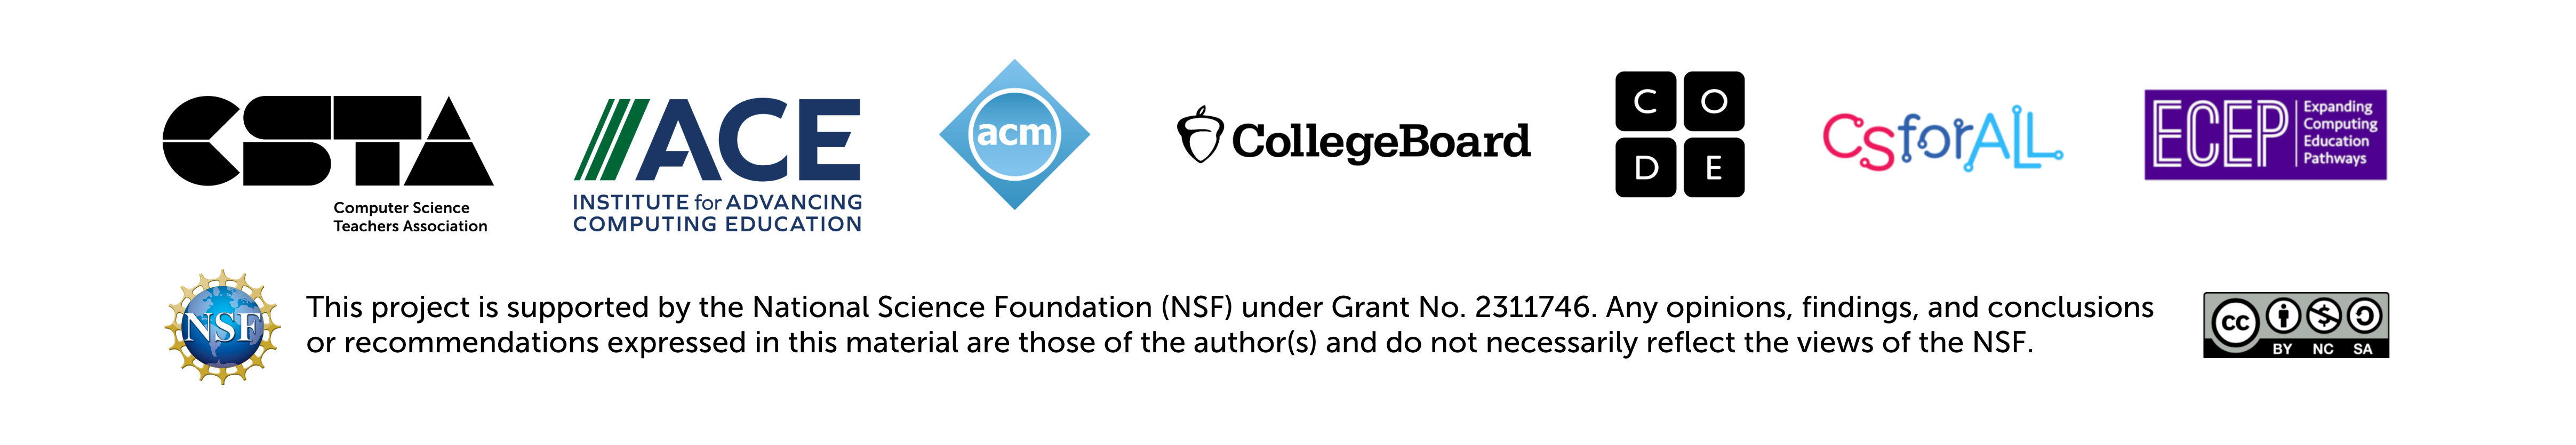